In [209]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import t #https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b
#import curfe fit from scipy
from scipy.optimize import curve_fit

%matplotlib inline

#Increase text size
plt.rcParams.update({'font.size': 25})

#Set figure background to not be transparent
plt.rcParams['figure.facecolor'] = 'white'

#Set tight bbox inches for figure save
plt.rcParams['savefig.bbox'] = 'tight'


In [210]:
def listdir_fullpath(d, returnOnlyPaths = False):
    allPaths = [os.path.join(d, f) for f in os.listdir(d)]

    if returnOnlyPaths:
        allPaths = [path for path in allPaths if os.path.isdir(path)]
    else:
        #get only files ending in .txt
        allPaths = [path for path in allPaths if os.path.isfile(path) and path.endswith(".txt")]
    return allPaths

def getConfidenceInterval(percentage, data):
    n = len(data)
    m = np.mean(data)
    s = np.std(data)
    t_crit = np.abs(t.ppf((1-percentage)/2,n))
    interval = t_crit * s #/ np.sqrt(n)
    return m - interval, m + interval

class simulationBatch:
    def __init__(self, simulationFolder):
        self.droneNumber = int(simulationFolder.split("\\")[-1])
        self.getSimulations(simulationFolder)

    def getSimulations(self, simulationFolder):
        self.simulationFiles = listdir_fullpath(simulationFolder)
        self.inspectionTimes = []
        self.simulationTimes = []
        self.collisionNumbers = []
        self.paretoPoints = []
        for file in self.simulationFiles:
            #index = int(file)
            with open(file, "r") as txt_file:
                line = txt_file.readlines()[0]
                line = line.replace(',', '.')
            inspectionTime = float(line.split("/")[1])/60 #Convert to minutes
            collisionNumber = int(line.split("/")[3])
            self.inspectionTimes.append(inspectionTime)
            self.simulationTimes.append(float(line.split("/")[2]))
            self.collisionNumbers.append(collisionNumber)
            self.paretoPoints.append(np.array([inspectionTime, collisionNumber]))
        
        self.inspectionTimes = np.array(self.inspectionTimes)
        self.simulationTimes = np.array(self.simulationTimes)
        self.collisionNumbers = np.array(self.collisionNumbers)
        self.paretoPoints = np.array(self.paretoPoints)

        self.inspectionTimeAverage = np.mean(self.inspectionTimes)
        self.simulationTimeAverage = np.mean(self.simulationTimes)
        self.collisionNumberAverage = np.mean(self.collisionNumbers)
        self.inspectionTimeBottom, self.inspectionTimeTop = getConfidenceInterval(0.95, self.inspectionTimes)

        self.inspectionTimeStd = np.std(self.inspectionTimes)
        self.inspectionTimeBottomStd = self.inspectionTimeAverage - self.inspectionTimeStd
        self.inspectionTimeTopStd = self.inspectionTimeAverage + self.inspectionTimeStd

        self.collisionNumbersBottom, self.collisionNumbersTop = getConfidenceInterval(0.95, self.collisionNumbers)
        self.collisionNumberStd = np.std(self.collisionNumbers)
        self.collisionNumberBottomStd = self.collisionNumberAverage - self.collisionNumberStd
        self.collisionNumberTopStd = self.collisionNumberAverage + self.collisionNumberStd

In [211]:
dataLocalPath = '1,30'

cwd = os.getcwd()
print(os.getcwd())
dataPath = os.path.join(cwd, dataLocalPath)
my_list = listdir_fullpath(dataPath, returnOnlyPaths=True)

print(my_list)

d:\Github\Swarm-of-Inspection-Drones\Simulation processing
['d:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\1', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\10', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\11', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\12', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\13', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\14', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\15', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\16', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\17', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\18', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\19', 'd:\\Github\\Swarm-of-Inspection-Drones\\Simulation processing\\1,30\\2', 'd:\\Github\\Swarm-of-Inspection-Drones\\S

In [212]:
simulationBatches = []
for i in my_list:
    simulationBatches.append(simulationBatch(i))

#sort the batches by drone number
simulationBatches.sort(key=lambda x: x.droneNumber)

#for each batch, print the average inspection time, average simulation time, and average collision number
for i in simulationBatches:
    print(i.droneNumber, i.inspectionTimeAverage, i.simulationTimeAverage, i.collisionNumberAverage)

1 37.96240148514851 14.868386633663366 2.4257425742574257
2 19.47501485148515 9.077129138613863 6.564356435643564
3 13.62847094059406 7.250464128712872 6.415841584158416
4 10.659607491749174 6.504467099009899 7.465346534653466
5 8.689573465346536 5.994836801980197 8.514851485148515
6 7.387397178217823 5.7905950990098995 12.118811881188119
7 6.498515082508249 5.986927663366337 15.207920792079207
8 5.839575709570956 5.903199435643564 17.831683168316832
9 5.283129851485149 5.957442198019802 20.613861386138613
10 4.855387788778878 6.117163267326733 23.237623762376238
11 4.555735726072607 6.347593435643565 27.940594059405942
12 4.282849983498349 6.647792118811881 35.26732673267327
13 4.0746449009901 6.994188999999999 38.93069306930693
14 3.885769323432343 7.234070445544553 45.851485148514854
15 3.7174121287128705 7.509567009900992 49.524752475247524
16 3.6014530363036306 7.77278001980198 58.475247524752476
17 3.514356567656766 8.053747257425742 66.5049504950495
18 3.400343085808581 8.534005

[36.33754205  1.4592714 ]
[0.61547307 1.64021362 0.49345221]


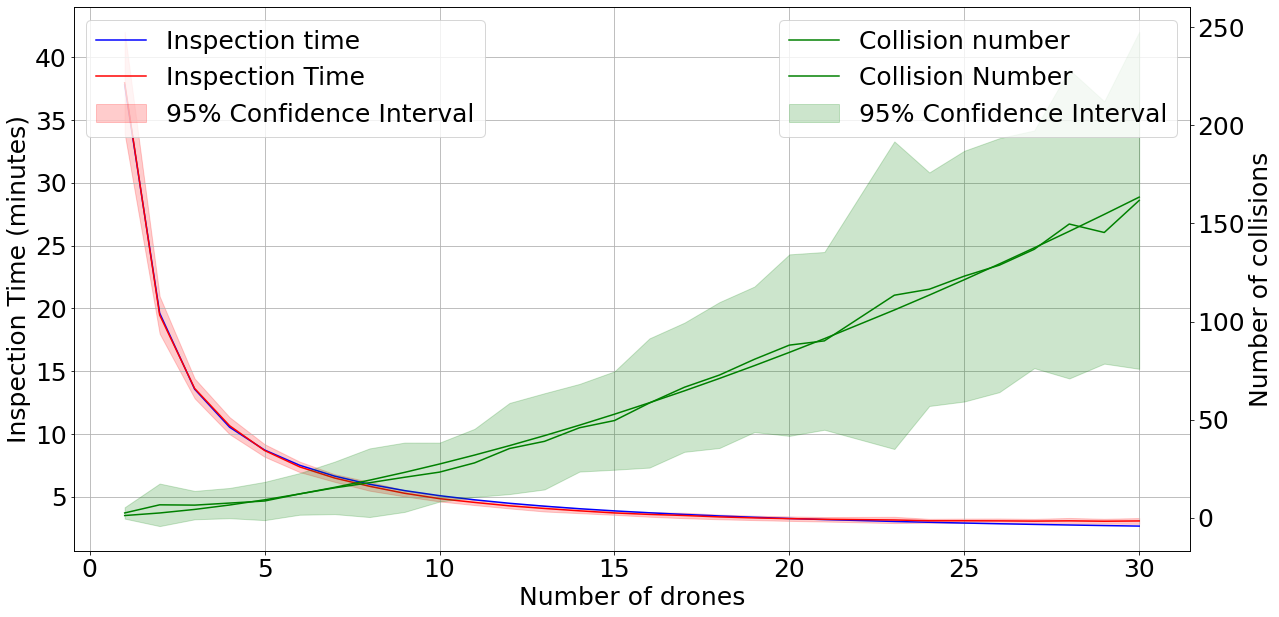

In [231]:

#plot the average inspection time, average simulation time, and average collision number

fig0 = plt.figure(figsize=(20,10))

ax0 = fig0.add_subplot(111)
ax1 = ax0.twinx()


ax0.plot([i.droneNumber for i in simulationBatches], [i.inspectionTimeAverage for i in simulationBatches], 'r', label = "Inspection Time")
#fill inbetween the confidence interval
ax0.fill_between([i.droneNumber for i in simulationBatches], [i.inspectionTimeBottom for i in simulationBatches], [i.inspectionTimeTop for i in simulationBatches], alpha=0.2, color = "red", label = "95% Confidence Interval")
#plt.plot([i.droneNumber for i in simulationBatches], [i.simulationTimeAverage for i in simulationBatches], 'bo')
ax1.plot([i.droneNumber for i in simulationBatches], [i.collisionNumberAverage for i in simulationBatches], 'g', label = "Collision Number")
ax1.fill_between([i.droneNumber for i in simulationBatches], [i.collisionNumbersBottom for i in simulationBatches], [i.collisionNumbersTop for i in simulationBatches], alpha=0.2, color = "green", label = "95% Confidence Interval")


x = np.array([i.droneNumber for i in simulationBatches])
y = np.array([i.inspectionTimeAverage for i in simulationBatches])
w = np.array([i.collisionNumberAverage for i in simulationBatches])

#fit a fucntion of 1/x to y as a function of x using numpy
popt, pcov = curve_fit(lambda x, a, b: a/x + b, x, y)

#fit an power function to w as a function of x using numpy
popt3, pcov3 = curve_fit(lambda x, a, b,c: a*x**b+c, x, w)

#plot fitted line
ax0.plot(x, popt[0]/x + popt[1], 'b-', label='Inspection time')
ax1.plot(x, popt3[0]*x**popt3[1]+popt3[2], 'g-', label='Collision number')

#print the functions
print(popt)
print(popt3)

#thank you Github Copilot <3

#generate legend
ax0.legend(loc='upper left')
ax1.legend(loc='upper right')
#set x title
ax0.set_xlabel("Number of drones")
#set y title
ax0.set_ylabel("Inspection Time (minutes)")
ax1.set_ylabel("Number of collisions")
#set title
#ax0.set_title("Inspection Time and Number of Collisions vs Number of drones")

#add grid to figure
ax0.grid(True)

#save figure
fig0.savefig(os.path.join(dataPath, "inspectionTimeAndCollisionNumber.png"))

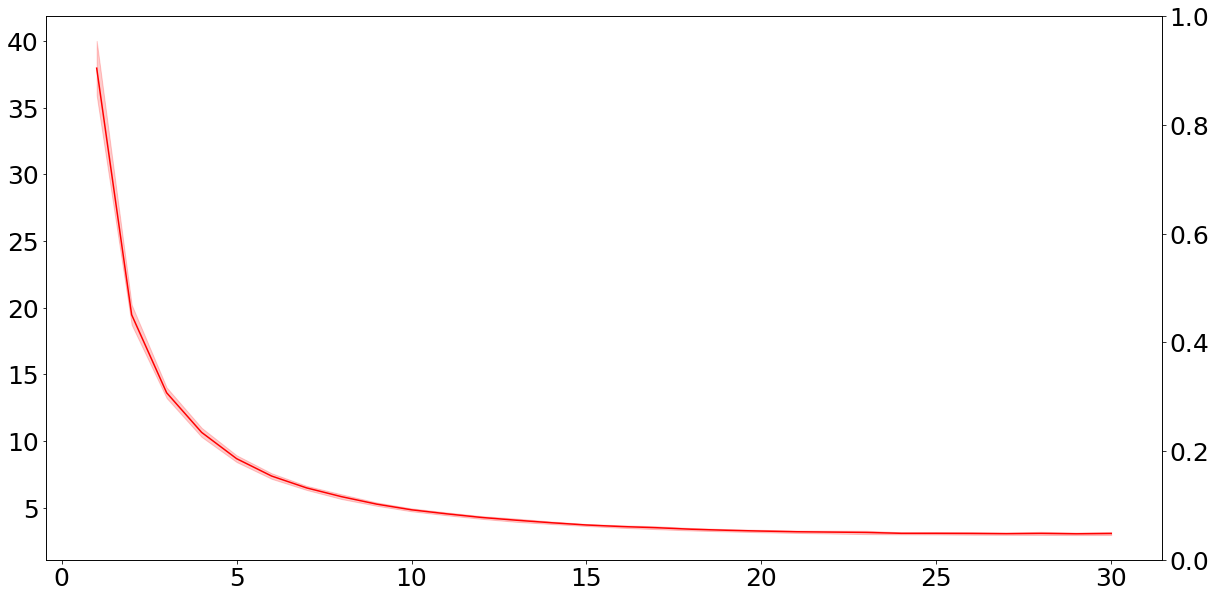

In [214]:
#plot the average inspection time, average simulation time, and average collision number

fig0 = plt.figure(figsize=(20,10))
ax0 = fig0.add_subplot(111)
ax1 = ax0.twinx()

ax0.plot([i.droneNumber for i in simulationBatches], [i.inspectionTimeAverage for i in simulationBatches], 'r')
#fill inbetween the confidence interval
ax0.fill_between([i.droneNumber for i in simulationBatches], [i.inspectionTimeBottomStd for i in simulationBatches], [i.inspectionTimeTopStd for i in simulationBatches], alpha=0.2, color = "red")
#plt.plot([i.droneNumber for i in simulationBatches], [i.simulationTimeAverage for i in simulationBatches], 'bo')
#ax1.plot([i.droneNumber for i in simulationBatches], [i.collisionNumberAverage for i in simulationBatches], 'g')
#ax1.fill_between([i.droneNumber for i in simulationBatches], [i.collisionNumberBottomStd for i in simulationBatches], [i.collisionNumberTopStd for i in simulationBatches], alpha=0.2, color = "green")


In [215]:
def plotCoefficientOfVariation(data):
    
    newList = []
    averages = []
    stds = []
    coefVars = []
    simulationNumbers = []
    for index, i in enumerate(data):
        newList.append(i)
        array = np.array(newList)
        averages.append(np.mean(array))
        stds.append(np.std(array))
        coefVar = np.std(array)/np.mean(array)
        coefVars.append(coefVar)
        simulationNumbers.append(index)

    #plot coefVars as function of simulationNumber
    fig1 = plt.figure(figsize=(20,10))
    ax1 = fig1.add_subplot(111)
    ax1.plot(simulationNumbers, coefVars, 'r')
    ax1.set_xlabel("Simulation Number")
    ax1.set_ylabel("Coefficient of Variation")
    #ax1.set_title("Coefficient of Variation vs Simulation Number")
    ax1.grid(True)
    fig1.savefig(os.path.join(dataPath, "coefVar.png"))

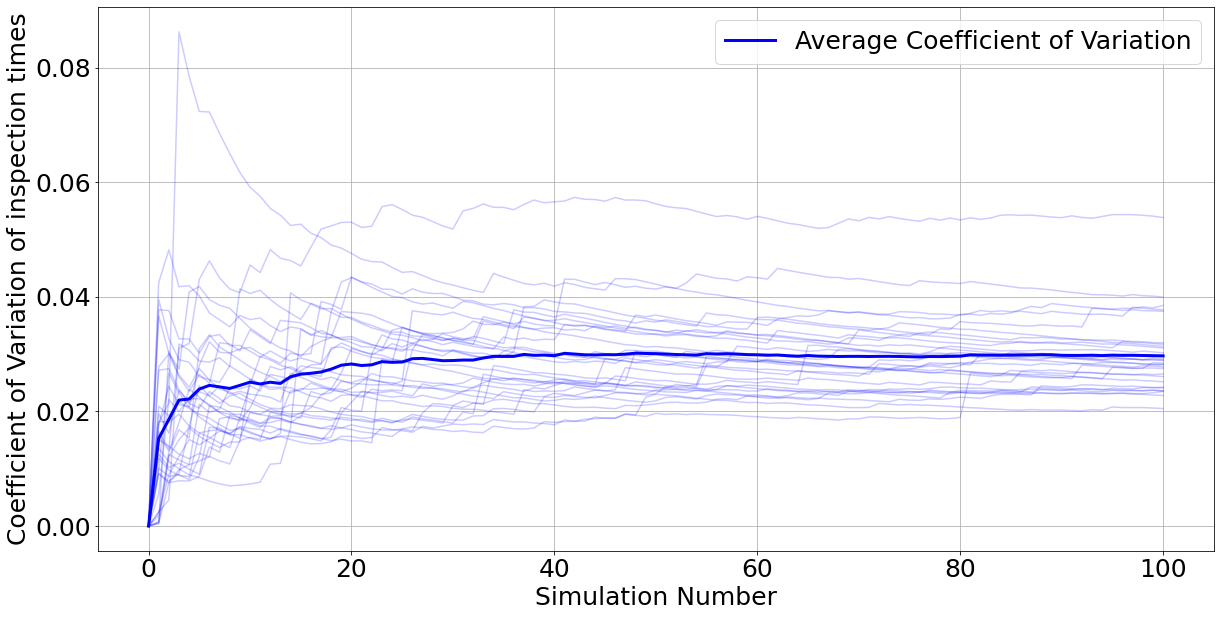

In [216]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)

coefVarsPerSimulationBatch = []
for simulationBatch in simulationBatches:
    newList = []
    averages = []
    stds = []
    coefVars = []
    simulationNumbers = []
    for index, i in enumerate(simulationBatch.inspectionTimes):
        newList.append(i)
        array = np.array(newList)
        averages.append(np.mean(array))
        stds.append(np.std(array))
        coefVar = np.std(array)/np.mean(array)
        coefVars.append(coefVar)
        simulationNumbers.append(index)
    coefVarsPerSimulationBatch.append(coefVars)

    #plot coefVars as function of simulationNumber slightly transparent
    ax1.plot(simulationNumbers, coefVars, 'b', alpha=0.2)

#calculate average coefVar per simulationBatch
coefVarsPerSimulationBatch = np.array(coefVarsPerSimulationBatch)
averageCoefVarsPerSimulationBatch = np.mean(coefVarsPerSimulationBatch, axis=0)
#plot average coefVar per simulationBatch slightly thicker
ax1.plot(simulationNumbers, averageCoefVarsPerSimulationBatch, 'b', linewidth=3, label = "Average Coefficient of Variation")
ax1.set_xlabel("Simulation Number")
ax1.set_ylabel("Coefficient of Variation of inspection times")
#ax1.set_title("Coefficient of Variation of inspection times vs Simulation Number")
ax1.grid(True)
#Set labels
ax1.legend(loc='upper right')
fig1.savefig(os.path.join(dataPath, "coefVarInspection.png"))

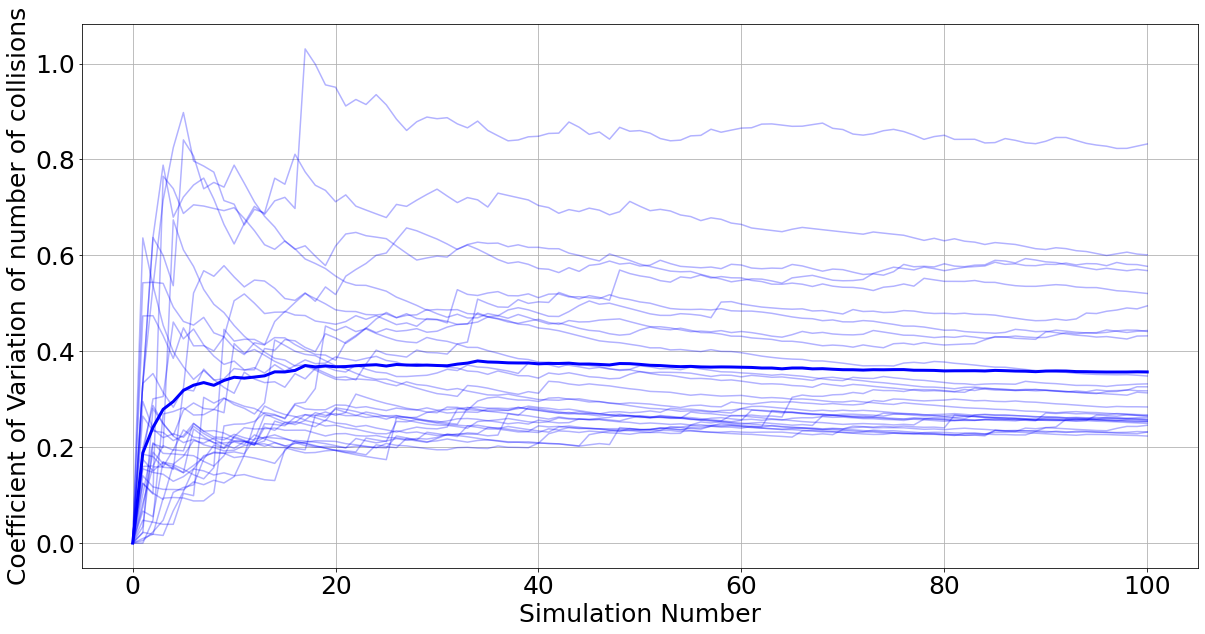

In [217]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)

coefVarsPerSimulationBatch = []
for simulationBatch in simulationBatches:
    newList = []
    averages = []
    stds = []
    coefVars = []
    simulationNumbers = []
    for index, i in enumerate(simulationBatch.collisionNumbers):
        newList.append(i)
        array = np.array(newList)
        averages.append(np.mean(array))
        stds.append(np.std(array))
        coefVar = np.std(array)/np.mean(array)
        coefVars.append(coefVar)
        simulationNumbers.append(index)
    coefVarsPerSimulationBatch.append(coefVars)

    #plot coefVars as function of simulationNumber slightly transparent
    ax1.plot(simulationNumbers, coefVars, 'b', alpha=0.3)

#calculate average coefVar per simulationBatch
coefVarsPerSimulationBatch = np.array(coefVarsPerSimulationBatch)
averageCoefVarsPerSimulationBatch = np.mean(coefVarsPerSimulationBatch, axis=0)
#plot average coefVar per simulationBatch slightly thicker
ax1.plot(simulationNumbers, averageCoefVarsPerSimulationBatch, 'b', linewidth=3, label = "Average Coefficient of Variation")
ax1.set_xlabel("Simulation Number")
ax1.set_ylabel("Coefficient of Variation of number of collisions")
#ax1.set_title("Coefficient of Variation of number of collisions vs Simulation Number")
ax1.grid(True)
fig1.savefig(os.path.join(dataPath, "coefVarCollision.png"))

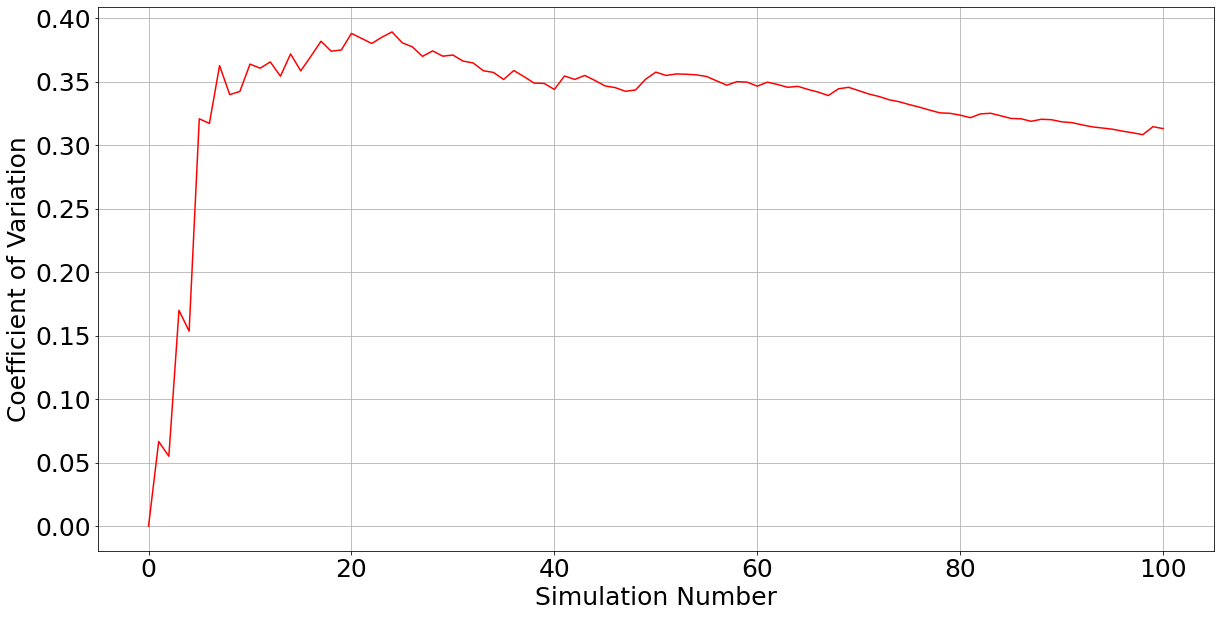

In [218]:
simulationBatch = simulationBatches[10]
plotCoefficientOfVariation(simulationBatch.collisionNumbers)

C:\Users\serva\AppData\Local\Temp/ipykernel_10044/13734926.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


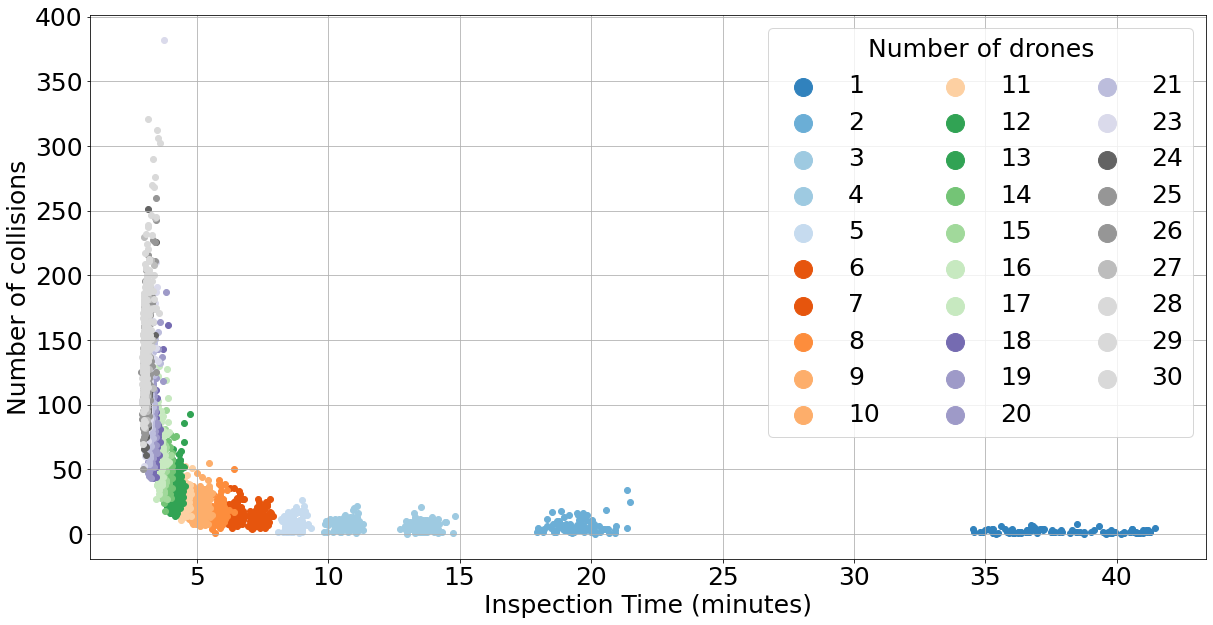

In [219]:

#%matplotlib widget

#make a new figure
fig1 = plt.figure(figsize=(20,10))
ax2 = fig1.add_subplot(111)

#create a list of colors for every drone number in simulationBatches
colors = []
for i in simulationBatches:
    #convert droneNumber into color
    colors.append(cm.tab20c(i.droneNumber/len(simulationBatches)))

#for each batch, plot the paretoPoints on a scatter plot with a color gradient based on the drone number
for index, i in enumerate(simulationBatches):
    ax2.scatter(i.paretoPoints[:,0], i.paretoPoints[:,1], marker='o', color = colors[index], label = str(i.droneNumber))

#add color bar using colors

#fig1.colorbar(cm.ScalarMappable(cmap="tab20c"), ax=ax2)

#generate legend
ax2.legend(loc='upper right', ncol=3, title = "Number of drones", markerscale=3)
#set x title
ax2.set_xlabel("Inspection Time (minutes)")
#set y title
ax2.set_ylabel("Number of collisions")
#set title
#ax2.set_title("Collision number vs Inspection time")

#add grid to figure
ax2.grid()

#save figure
fig1.savefig(os.path.join(dataPath, "paretoPoints.png"))

#Make matplotlib interactive
fig1.show()


In [220]:
def createGaussian(data):
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = np.exp(-(x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return x,y


In [221]:
def plotDistribution(data, title, xlabel, ylabel):
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111)
    #plot the inspection time distribution for the first and last batch
    ax.hist(data, bins=10, density=True, alpha=0.5)

    #fit a gaussian to the inspection time distribution
    x, y = createGaussian(data)
    x_bot, x_top = getConfidenceInterval(0.95, data)

    #select x and y values within the confidence interval
    x_in = x[(x > x_bot) & (x < x_top)]
    y_in = y[(x > x_bot) & (x < x_top)]

    #Set title
    #ax.set_title(title)
    #Set x label
    ax.set_xlabel(xlabel)
    #Set y label
    ax.set_ylabel(ylabel)

    ax.plot(x, y)
    ax.fill_between(x_in, 0, y_in, alpha=0.2, color = "red", label = "Mean 95 % Confidence Interval")

    #generate legend
    ax.legend(loc='upper left')
    #save figure
    fig.savefig(os.path.join(dataPath, title + ".png"))

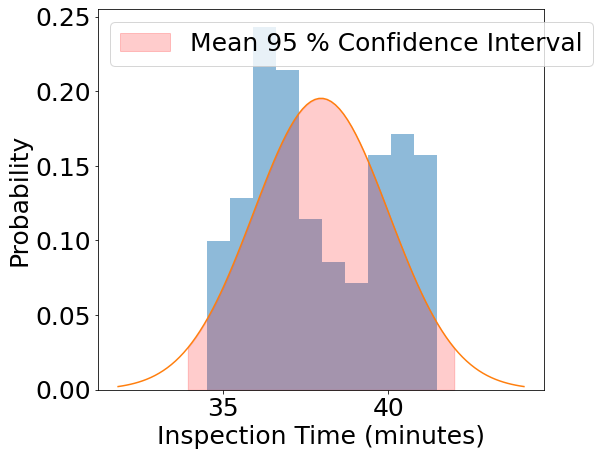

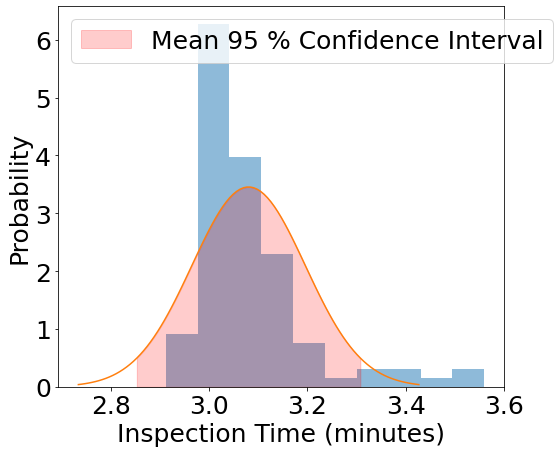

In [222]:
plotDistribution(simulationBatches[0].inspectionTimes, "Inspection time distribution for 2 drones", "Inspection Time (minutes)", "Probability")
plotDistribution(simulationBatches[-1].inspectionTimes, "Inspection time distribution for 30 drones", "Inspection Time (minutes)", "Probability")

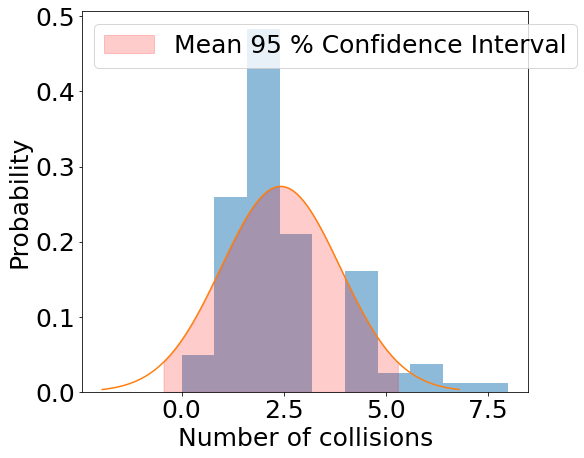

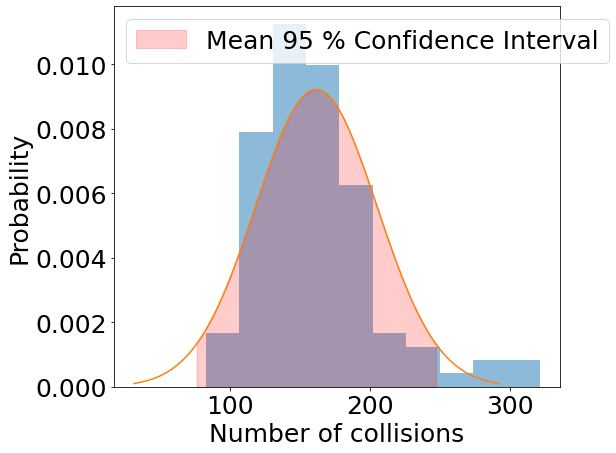

In [223]:
plotDistribution(simulationBatches[0].collisionNumbers, "Number of collisions distribution for 2 drones", "Number of collisions", "Probability")
plotDistribution(simulationBatches[-1].collisionNumbers, "Number of collisions distribution for 30 drones", "Number of collisions", "Probability")